# Credit Card Fraud Detection

## Data
Our data consists of a single csv file `data/creditcard.csv`, it contains data about credit card transactions in Europe, the data is anonymized and contains 31 columns, 28 of them are PCA features, alongside time and amount. The target variable is  the `Class` column which is the label of the transaction, it is either 0 or 1, 0 meaning the transaction is not fraudulent and 1 meaning it is fraudulent.

## Goal
Our goal is to build a classification model that can predict whether a transaction is fraudulent or not.

## Analysis
Before building the model, we need to investigate the data and answer a set of questions, like:
- What is the distribution of the target variable, the PCA features, time and amount?
- Are there any missing values?
- Are there any outliers?
- Are there any correlations between the features?
- etc.

## Import Libraries and Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (5, 5)

In [2]:
# import the dataset
data = pd.read_csv('../data/raw/creditcard.csv')

## Explore and Explain Data

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
data.shape

(284807, 31)

In [5]:
data.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

Let's take a look at the data, its size, the columns, and the data types.  
We have a dataset of 284,807 transactions, with 31 columns that are all numerical.  
The columns are :

- Time: The time elapsed between each transaction and the first transaction in the dataset.
- Amount: The amount of the transaction.
- Class: The class of the transaction, 1 for fraud and 0 for normal.
- V1-V28: The result of a PCA Dimensionality reduction, these features don't have any interpretable meaning, because they summarize the information of the original features, which were kept hidden in order to protect user identities and sensitive data.

When we look at the encoding of the columns, we see that they are all numerical, which means that we don't have any categorical data to deal with. Which also noted by the following code.

In [6]:
# count the null values
data.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
# rename the columns to lower case
data.columns = data.columns.str.lower()
data.rename(columns={'class': 'fraud'}, inplace=True)

Let's look at the distribution of the fraudulent feature, we see that the data is highly unbalanced, with only 492 frauds out of 284,807 transactions.  
Later on, we'll see how we are going to tackle this unbalanced problem, but for now, let's keep exploring the other columns.  

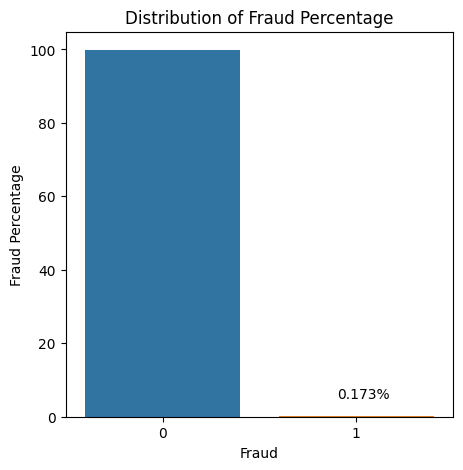

In [8]:
# distribution of Fraud percentage
fraud_series = data.fraud.value_counts(normalize=True) * 100

# plot the distribution of fraud percentage
sns.barplot(x=fraud_series.index, y=fraud_series.values)

# add anotation to the plot
plt.annotate(f'{np.round(fraud_series[1], 3)}%', xy=(0.9, 5), xytext=(0.9, 5))

# add labels to the plot
plt.xlabel('Fraud')
plt.ylabel('Fraud Percentage')
plt.title('Distribution of Fraud Percentage')

plt.show()

Let's look at the distribution of the 28 PCA features.  
Here are a few remarks:

- All of the features are unimodal and normally dsitributied, except of the first feature v1, which seems to be left skewed.
- The features are all centered around 0, and their scales are almost the same.
- We can notice the existence of outliers in the data.


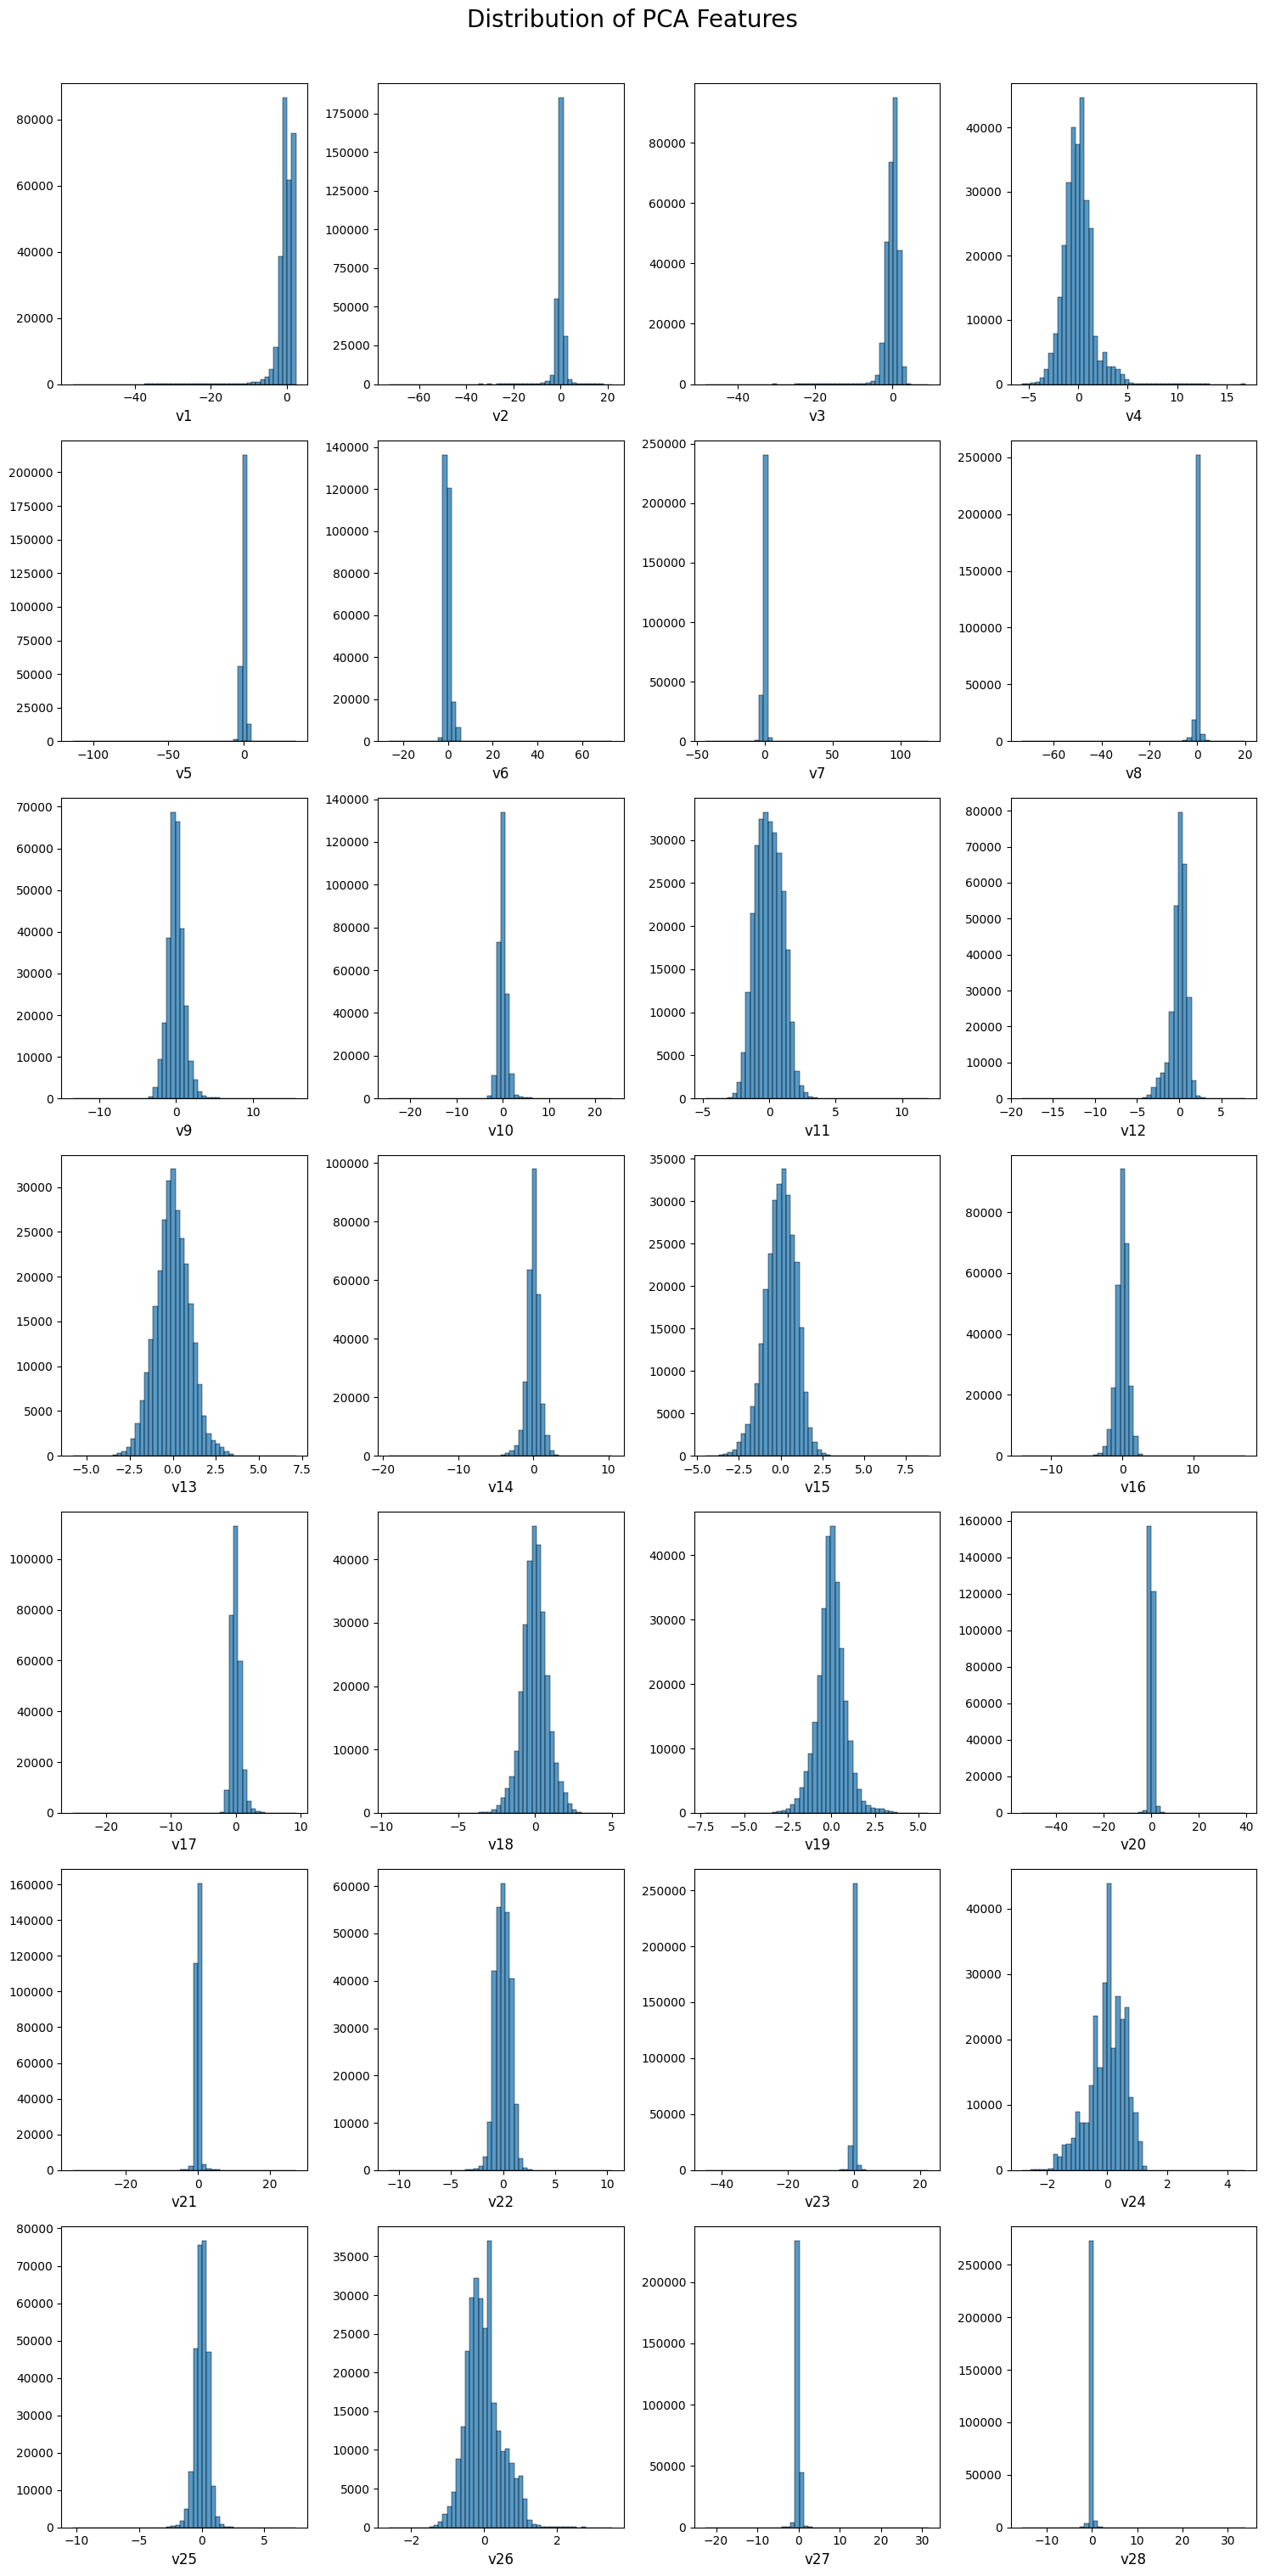

In [9]:
# list of pca features
PCA_features = [f'v{i}' for i in range(1, 29)]

# create a 7x4 grid of subplots
fig, ax = plt.subplots(7, 4, figsize=(15, 30))

# plot the distribution of each pca feature
for i, feature in enumerate(PCA_features):
    row = i//4
    col = i%4
    sns.histplot(data[feature], ax=ax[row, col], bins=50)
    ax[row, col].set_ylabel('')
    ax[row, col].set_xlabel(feature, fontsize=12)

# add a title to the plot
plt.suptitle('Distribution of PCA Features', fontsize=20, y=1.01)
plt.tight_layout()
plt.show()

We said that these features are the results of PCA, meaning that there is no correlation between them, which is shown in the next heatmap.  
By the way, the reason behind this is because principal components (features obtained with PCA) are created by linearly combining the original features in a way that maximizes the variance explained by each component. This means that each component is orthogonal to the others, and hence they are not correlated.

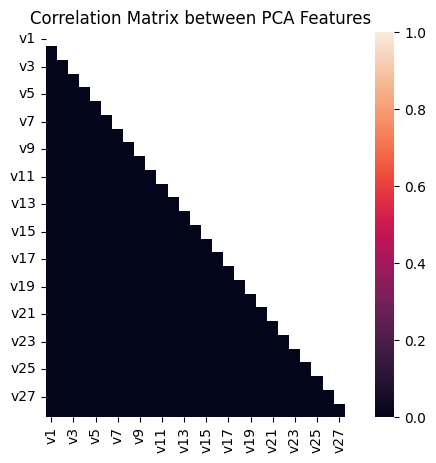

In [10]:
# correlation matrix between the PCA features

sns.heatmap(np.abs(data[PCA_features].corr()), mask=np.triu(data[PCA_features].corr()), vmin=0, vmax=1)
plt.title('Correlation Matrix between PCA Features')
plt.yticks(rotation=0)
plt.show()

Moving on, let's see how time and amount are distributed.  
Recall that time refers to the number of seconds elapsed between each transaction and the first transaction in the dataset.  
The observations were taken in a timespan of two days.

Looking at the distribution of time, using a histogram, we see that at the begining of each day, the number of transactions is lower than the rest of the day, which is logical, this being said, we can assume that the fraudulant transactions are mostly done during the day, and not at night.  
In order to verify this assumption we will:

- Group the seconds into hours.
- Plot the number of transactions per hour.

In [11]:
# summary statistics of time and amount
data[['time', 'amount']].describe()

,time,amount
count,284807.000000,284807.000000
mean,94813.859575,88.349619
std,47488.145955,250.120109
min,0.000000,0.000000
25%,54201.500000,5.600000
50%,84692.000000,22.000000
75%,139320.500000,77.165000
max,172792.000000,25691.160000


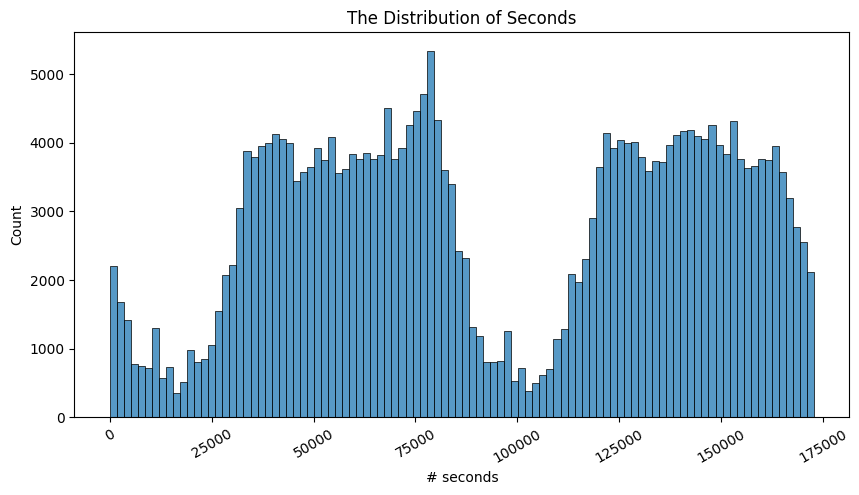

In [12]:
# plot the histogram of time
plt.figure(figsize=(10, 5))
sns.histplot(data=data, x='time', bins=100)
plt.xlabel('# seconds')
plt.xticks(rotation=30)
plt.title('The Distribution of Seconds')
plt.show()

After groupiing seconds into hours, and plotting the distribution of frauds per hour, we see that there isn't any crystal clear pattern that we can derive as of the period of the day in which the frauds happen the most.

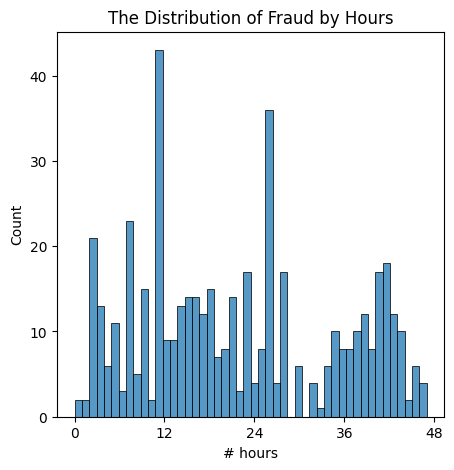

In [13]:
# group the seconds into hours
data['hour'] = data.time // 3600

# distribution of fraud percentage by hour
sns.histplot(data=data.loc[data['fraud']==1], x='hour', bins=48)
plt.title('The Distribution of Fraud by Hours')
plt.xlabel('# hours')
plt.xticks([i for i in range(0, 49, 12)])
plt.show()

Let's move to the amount feature.  
Recall that on the summary statistics table, the quartiles showed us that 75% of the data is below 77, and the maximum amount is 25691, we can conlude that the data is extremely right skewed, and that there are outliers in the data.  
However, we need to look at the distribution of this feature for each class of transaction, in order to see if there is any difference between the two classes.

First, we are going to perform a two sample t-test, to see if the means of the two classes are significantly different.  
Before doing that, we need to check if the amount is normally distributed.

Our data is skewed, let's apply a log transformation to it, in order to make more normal.

<Axes: >

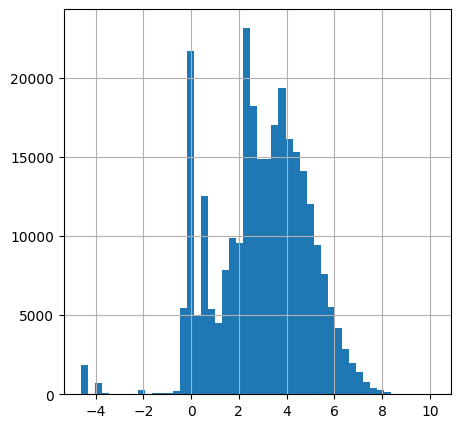

In [14]:
# log transform the amount (we added 0.01 in order to avoid log(0))
data['amount_logged'] = np.log(data.amount + 0.01)

# plot the histogram of amount
data['amount_logged'].hist(bins=50)

Now that we have a more normal distribution, let's perform the two sample t-test.  
The p_value is so low (in the order of 10e-7), meaning that the means of the two classes are significantly different, in other words, there is an association between the amount and the class of the transaction.

In [15]:
# perform two sample t-test
from scipy.stats import ttest_ind

# get the fraud and non-fraud data
fraud_data = data.loc[data['fraud']==1]
non_fraud_data = data.loc[data['fraud']==0]

# perform two sided two sample t-test
t_stat, pval = ttest_ind(fraud_data.amount_logged, non_fraud_data.amount_logged, equal_var=False, alternative='two-sided')

print(pval)

2.682534276166596e-07


## Conclusion

Now that we reached the end, we are going to save the changes made to our dataset into a new csv file, so that we can use it in the next notebook. Here is a summary of what we did so far:

- We've seen how the variance of the PCA features is decreasing, which gives more importance to the first components that the last ones. These components are not correlated to each other, and they are normalized.
- The time feature does not explain the class of the transaction, since transactions are distributed randomly throughout the day.
- The amount feature is significantly different between the two classes of transactions, meaning that it can be a good feature to use in our model.

### Save results

In [ ]:
# save new data
data.to_csv('../data/processed/creditcard_new.csv', index=False)